# Multiple linear regression (MLR)
We are choosing MLR, as the dataset contains multiple input features and two continuous target features

As we have to predict two continuous values, we have to apply MLR twice.
1. 1st time is for Y1(heating load).
2. 2nd time is for Y2(Cooling load)

In [46]:
import pandas as pd

# load the dataset 
df = pd.read_excel('energy-efficiency-dataset.xlsx')

# seperating the input features and target features
X = df.iloc[:, 0:8]
y1 = df.iloc[:, 8] # This corresponds to heating load
y2 = df.iloc[:, 9] # Thsi corresponds to cooling load

In [47]:
import numpy as np
from math import sqrt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score # for assessing the model
from sklearn.model_selection import train_test_split # for dividing the dataset into train and test set
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest 
from sklearn.preprocessing import StandardScaler # for standardizing the features

import seaborn as sn # for heatmap
import matplotlib.pyplot as plt # for ploting the results

%matplotlib inline

# Function for MLR
# inputs: statistic used for feature seletion, X, and target feature
def multiple_linear_regression(statistic, X, y, target_label):
    
    if(statistic == f_regression):
        scoring_fn = 'f_regression'
        y_lim = 0.7
    else:
        scoring_fn = 'mutual_info_regression'
        y_lim = 0.3
    
    # storing the rmse and r2 score for each subset of features in forward selection of the the features
    y_rmse = []
    y_r2_score = []

    for i in range(1,9):
        
        # selecting the i best features using the below function
        test = SelectKBest(score_func = statistic, k=i).fit(X, y)
        X_new = test.transform(X)

        # Standardazing the features selected by above method to 0 mean and unit variance
        scaler = StandardScaler()
        X_std = scaler.fit_transform(X_new)
        
        # Split the data into training/testing sets
        X_train, X_test, y_train, y_test = train_test_split(
                X_std, y, test_size = 0.33, random_state = 1) # test size = 33%
        
        # Creating the MLR
        mlr = linear_model.LinearRegression()
        
        # Train the model using the training sets
        mlr.fit(X_train, y_train)
    
        # Make predictions using the testing set
        y_pred = mlr.predict(X_test)
    
        # calculating the rmse and storing it in the rmse list to plot later
        # to select best subset of fatures)
        y_rmse.append(sqrt(mean_squared_error(y_test, y_pred)))
        
        # calculating the R2(Coef. of determination) and storing it in the list to plot later 
        # to select best subset of fatures)
        y_r2_score.append(r2_score(y_test, y_pred))
    
    k = np.array([1, 2, 3, 4, 5, 6, 7, 8])
    plt.figure()
    plt.grid(True)
    plt.title('MLR for {} ({})'.format(target_label, scoring_fn))
    plt.xlabel('Number of features')
    plt.ylabel('Root mean squared error')
    plt.xlim(0, 9)
    plt.plot(k, y_rmse, lw = 2, marker = 'o', markersize = 7)

    plt.figure()
    plt.grid(True)
    plt.title('MLR for {} ({})'.format(target_label, scoring_fn))
    plt.xlabel('Number of features')
    plt.ylabel('Coefficient of determination')
    plt.xlim(0,9)
    plt.ylim(y_lim, 1)
    plt.plot(k, y_r2_score, lw = 2, marker = 'o', markersize = 7)

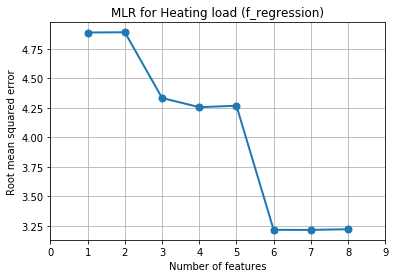

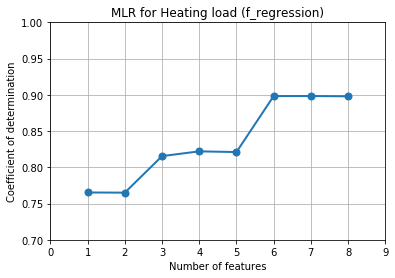

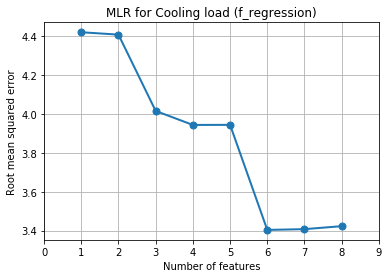

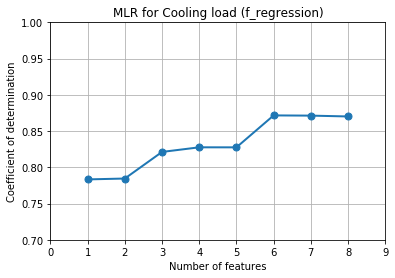

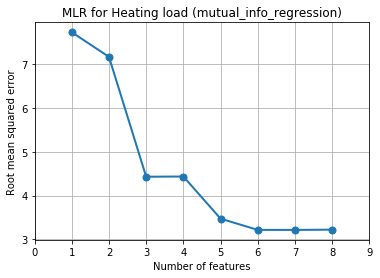

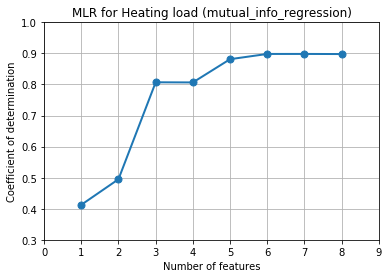

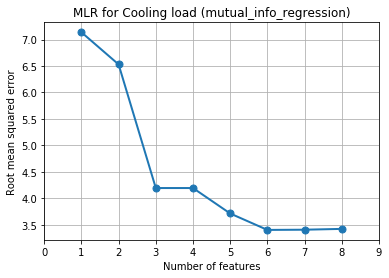

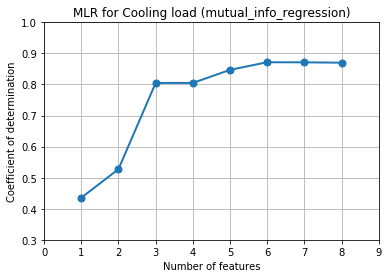

In [48]:
y1 = np.ravel(y1)
y2 = np.ravel(y2)

multiple_linear_regression(f_regression, X, y1, 'Heating load')
multiple_linear_regression(f_regression, X, y2, 'Cooling load')
multiple_linear_regression(mutual_info_regression, X, y1, 'Heating load')    
multiple_linear_regression(mutual_info_regression, X, y2, 'Cooling load')

## Analysis of above results:
- All features selection metrics are showing that for more than 6 features, there is no improvement either in  rmse or r2_score

In [49]:
# Building the MLR using the 6 best features selected above results 

# MLR for y1 (Heating load)
test = SelectKBest(score_func = f_regression, k = 6).fit(X, y1)
X_new = test.transform(X)

# Standardazing the features selected by above method to 0 mean and unit variance
scaler = StandardScaler()
X_std = scaler.fit_transform(X_new)
        
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y1, test_size = 0.33, random_state = 1)

mlr_y1 = linear_model.LinearRegression()

# training the model with train set
mlr_y1.fit(X_train, y_train)

# testing the MLR with test set
y_pred = mlr_y1.predict(X_test)

# calculating the RMSE for Y1(Cooling load) for test
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
R2_score = r2_score(y_test, y_pred)

features = []
for i in range(len(test.get_support())):
    if(test.get_support()[i]):
        features.append("X" + str(test.get_support()[i] + i))
print("Selected Features are: " , features)

# Evaluation metrics of the model
print("\nMLR for Heating load(Y1):")
print("\t\t\tRMSE: %.2f" % rmse)
print("\t\t\tR2_Value (Coef. of determination): %.2f" % R2_score)

Selected Features are:  ['X1', 'X2', 'X3', 'X4', 'X5', 'X7']

MLR for Heating load(Y1):
			RMSE: 3.22
			R2_Value (Coef. of determination): 0.90


In [50]:
# Building the MLR using the 6 best features selected above results 

# MLR for y1 (Heating load)
test = SelectKBest(score_func = f_regression, k = 6).fit(X, y2)
X_new = test.transform(X)

# Standardazing the features selected by above method to 0 mean and unit variance
scaler = StandardScaler()
X_std = scaler.fit_transform(X_new)
        
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y2, test_size = 0.33, random_state = 1)

mlr_y1 = linear_model.LinearRegression()

# training the model with train set
mlr_y1.fit(X_train, y_train)

# testing the MLR with test set
y_pred = mlr_y1.predict(X_test)

# calculating the RMSE for Y1(Cooling load) for test
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
R2_score = r2_score(y_test, y_pred)

features = []
for i in range(len(test.get_support())):
    if(test.get_support()[i]):
        features.append("X" + str(test.get_support()[i] + i))
print("Selected Features are: " , features)

# Evaluation metrics of the model
print("\nMLR for Cooling load(Y2):")
print("\t\t\tRMSE: %.2f" % rmse)
print("\t\t\tR2_Value (Coef. of determination): %.2f" % R2_score)

Selected Features are:  ['X1', 'X2', 'X3', 'X4', 'X5', 'X7']

MLR for Cooling load(Y2):
			RMSE: 3.40
			R2_Value (Coef. of determination): 0.87
